<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загружаем-dataset" data-toc-modified-id="Загружаем-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загружаем dataset</a></span></li><li><span><a href="#Подготавливаем-признаки" data-toc-modified-id="Подготавливаем-признаки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготавливаем признаки</a></span></li><li><span><a href="#Выполняем-преобразование-признаков" data-toc-modified-id="Выполняем-преобразование-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выполняем преобразование признаков</a></span></li><li><span><a href="#Разделяем-выборку-на-train-и-test" data-toc-modified-id="Разделяем-выборку-на-train-и-test-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Разделяем выборку на train и test</a></span></li><li><span><a href="#Выбираем-модель" data-toc-modified-id="Выбираем-модель-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выбираем модель</a></span></li><li><span><a href="#Обучаем-модель" data-toc-modified-id="Обучаем-модель-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучаем модель</a></span></li><li><span><a href="#Оцениваем-качество-предсказания-на-test'e" data-toc-modified-id="Оцениваем-качество-предсказания-на-test'e-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Оцениваем качество предсказания на test'e</a></span></li><li><span><a href="#Визуализируем-ROC" data-toc-modified-id="Визуализируем-ROC-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Визуализируем ROC</a></span></li></ul></div>

In [1]:
import pandas as pd

In [2]:
import xgboost as xgb

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
import numpy as np

### Загружаем dataset

In [6]:
train_sample = pd.read_csv('./bank_scoring_train.csv.gz', sep='\t', compression='gzip')

In [7]:
train_sample.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.975614,39,1,0.678552,1850.0,4,0,0,0,3.0
1,0,0.006634,75,0,0.082087,10500.0,21,0,1,0,0.0
2,0,0.227432,48,1,0.202145,6059.0,9,0,1,0,3.0
3,0,0.290217,59,0,0.674392,4400.0,6,0,2,0,0.0
4,0,0.000000,80,0,0.000000,2596.0,2,0,0,0,1.0


### Подготавливаем признаки

In [8]:
y = train_sample['SeriousDlqin2yrs'].values

In [9]:
X = train_sample[[
    'RevolvingUtilizationOfUnsecuredLines', 
    'age', 
    'NumberOfTime30-59DaysPastDueNotWorse',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberOfTimes90DaysLate',
    'NumberRealEstateLoansOrLines',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfDependents'
]].values

### Выполняем преобразование признаков

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
min_max_scaler = MinMaxScaler()

In [12]:
X = min_max_scaler.fit_transform(X)

### Разделяем выборку на train и test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Выбираем модель

In [15]:
clf = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4)

### Обучаем модель

In [16]:
%%capture
clf.fit(X_train, y_train)

### Оцениваем качество предсказания на test'e

In [17]:
y_pred = clf.predict_proba(X_test)[:,1]

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

In [19]:
auc = roc_auc_score(y_score=y_pred, y_true=y_test)

In [20]:
print(auc)

0.8204596546038809


### Визуализируем ROC

In [21]:
import matplotlib.pyplot as plt

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

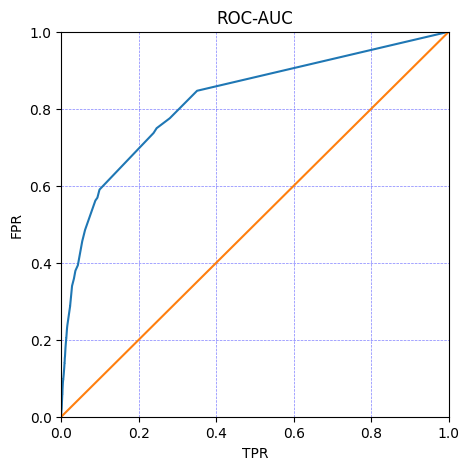

In [23]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1), np.linspace(0,1))

plt.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.title('ROC-AUC')

plt.show()

# DecisionTreeClassifier и LogisticRegression

In [24]:
train_sample = pd.read_csv('./bank_scoring_train.csv.gz', sep='\t', compression='gzip')
test_sample = pd.read_csv('./bank_scoring_test.csv.gz', sep='\t', compression='gzip')

features = [
    'RevolvingUtilizationOfUnsecuredLines', 
    'age', 
    'NumberOfTime30-59DaysPastDueNotWorse',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberOfTimes90DaysLate',
    'NumberRealEstateLoansOrLines',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfDependents'
]
target = 'SeriousDlqin2yrs'

X_train, X_test = train_sample[features].values, test_sample[features].values
y_train, y_test = train_sample[target].values, test_sample[target].values

min_max_scaler = MinMaxScaler()

min_max_scaler = min_max_scaler.fit(np.concat([X_train, X_test]))

X_train, X_test = min_max_scaler.transform(X_train), min_max_scaler.transform(X_test)

In [25]:
clf_dt = DecisionTreeClassifier(max_depth=10)
clf_lr = LogisticRegression(C=0.1)

In [26]:
%%capture
clf_dt.fit(X_train, y_train)
clf_lr.fit(X_train, y_train)

In [27]:
y_pred_dt = clf_dt.predict_proba(X_test)[:, -1] # type: ignore
y_pred_lr = clf_lr.predict_proba(X_test)[:, -1] # type: ignore

In [28]:
auc_dt = roc_auc_score(y_score=y_pred_dt, y_true=y_test) # type: ignore
auc_lr = roc_auc_score(y_score=y_pred_lr, y_true=y_test) # type: ignore

In [29]:
print(f'DecisionTreeClassifier - {auc_dt}\nLogisticRegression - {auc_lr}')

DecisionTreeClassifier - 0.7957744040562745
LogisticRegression - 0.6392934592725401


In [30]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt) # type: ignore
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr) # type: ignore

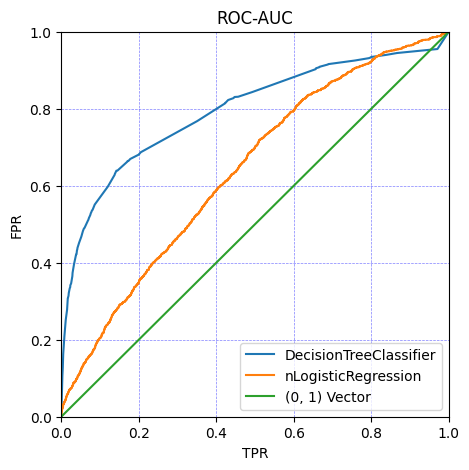

In [31]:
plt.figure(figsize=(5,5))

plt.plot(fpr_dt, tpr_dt)
plt.plot(fpr_lr, tpr_lr)
plt.plot(np.linspace(0,1), np.linspace(0,1))

plt.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend([
    'DecisionTreeClassifier',
    'nLogisticRegression',
    '(0, 1) Vector'
])
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.title('ROC-AUC')

plt.show()